# Coursework Example for BEMM461 Project 

## Introduction
This jupyter notebook provides an example for the BEMM461 project coursework, second submission.  Students are cautioned against following the example slavishly, but to pick out elements that can help support their understanding of what they can do.

## Table of Links
### Table
| Description | Link |
| -- | -- |
| Reflective blog |https://ele.exeter.ac.uk/mod/oublog/view.php?id=3234123|
| Chosen Dataset |https://www.data.gov.uk/dataset/44aba3b3-b9e4-4b0c-ad30-6ae2dcd9a9b9/police-use-of-force|

## Table of Contents
1. Executive Summary
2. Project Dashboard
3. Background to the Project
4. Articulation of Decision Making Process
5. Review of Analytics Methods Chosen
6. Review of Available Tools
7. Review of Chosen Datasets 
8. Visualisation of Data with Accompanying Code
9. Reflective Evaluation
10. Conclusion


## 1. Executive Summary

The culmination of this term's effort is showcased in this notebook, demonstrating the development of knowledge and skills acquired throughout the BEMM461 project. The primary focus lies in presenting a key visualization that encapsulates the project's essence. The notebook delves into the project's background, offering insights into the business context and expounding on the identified decision-making process. Moreover, it includes a thorough review and critique of the chosen analytics methods, followed by an evaluation of the selected tools.

To ensure transparency, a link to the utilized datasets is provided, facilitating access to the data for further exploration. The notebook showcases the Python code developed for visualizing the data, allowing others to grasp the methodologies employed. Additionally, a reflective blog is furnished, elucidating the project's journey, highlighting encountered challenges, and imparting valuable lessons gleaned.

The conclusion offers a comprehensive summary of the entire notebook, encapsulating the key findings and outcomes. Throughout the document, authoritative references are thoughtfully provided and diligently cited to support the presented work.



## 2. Project Dashboard
You are to provide an interactive, web based dashboard built using the Dash python framework that uses [Dash.plotly.com](http://dash.plotly.com).  

Your dashboard should provide the key visualisations of the project.  Use the dashboard to present the key visualisations that a manager or a consultant would need to make decisions.  Place the python code to create the dashboard in the cell of this notebook.  See below for an example.

Dashboards need to aggregate and summarise appropriately.  Consider how human memory and perception play a part in interpreting data.  Dashboards focus on iconic and short-term memory.  The goals of dashboard design are as follows:
- display using the most effective media possible so that it can easily be perceived.  This is where a web based dashboard is best suited.  
- Organise the information as concisely as possible so that short-term memory can optimally group and analyse quickly and accurately.  

Effective dashboards contain layers of information that the audience can delve into deeper.  Structure your information to account for these layers.  Use the Monitor, Analyse, Drill to detail approach as determined by Wayn Eckerson.
Monitor - a high level trend, issue or anomaly.
Analyse - show more detail but still a summary.  Tailored to your audience.
Detail - includes more details but still relevant to the audience.

c:\Users\harve\anaconda3\Lib\site-packages\plotnine\scales\scales.py:48: PlotnineWarning:

Scale for 'size' is already present.
Adding another scale for 'size',
which will replace the existing scale.




c:\Users\harve\anaconda3\Lib\site-packages\plotnine\scales\scales.py:48: PlotnineWarning:

Scale for 'size' is already present.
Adding another scale for 'size',
which will replace the existing scale.




---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: Object of type Text is not JSON serializable



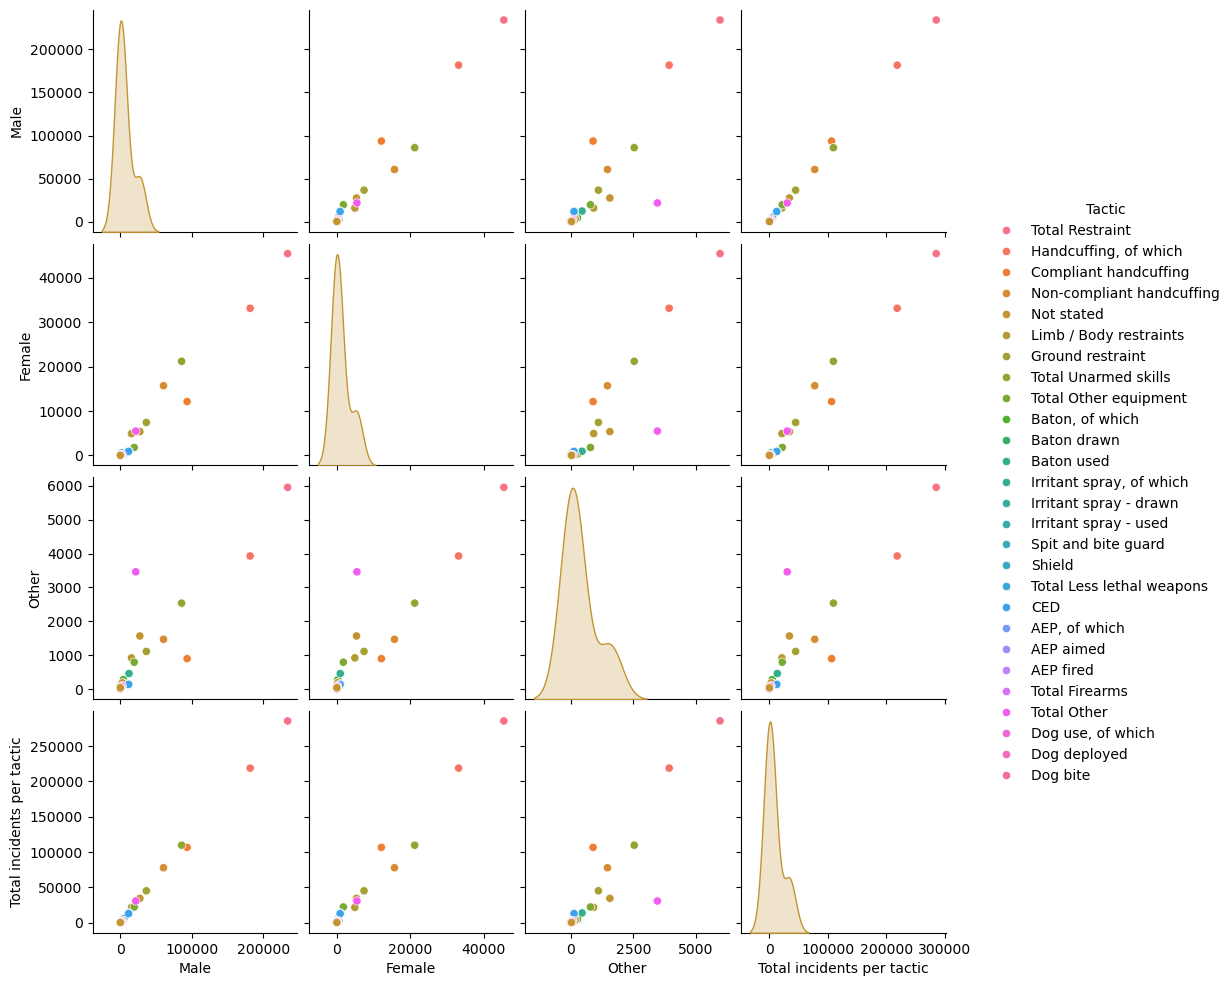

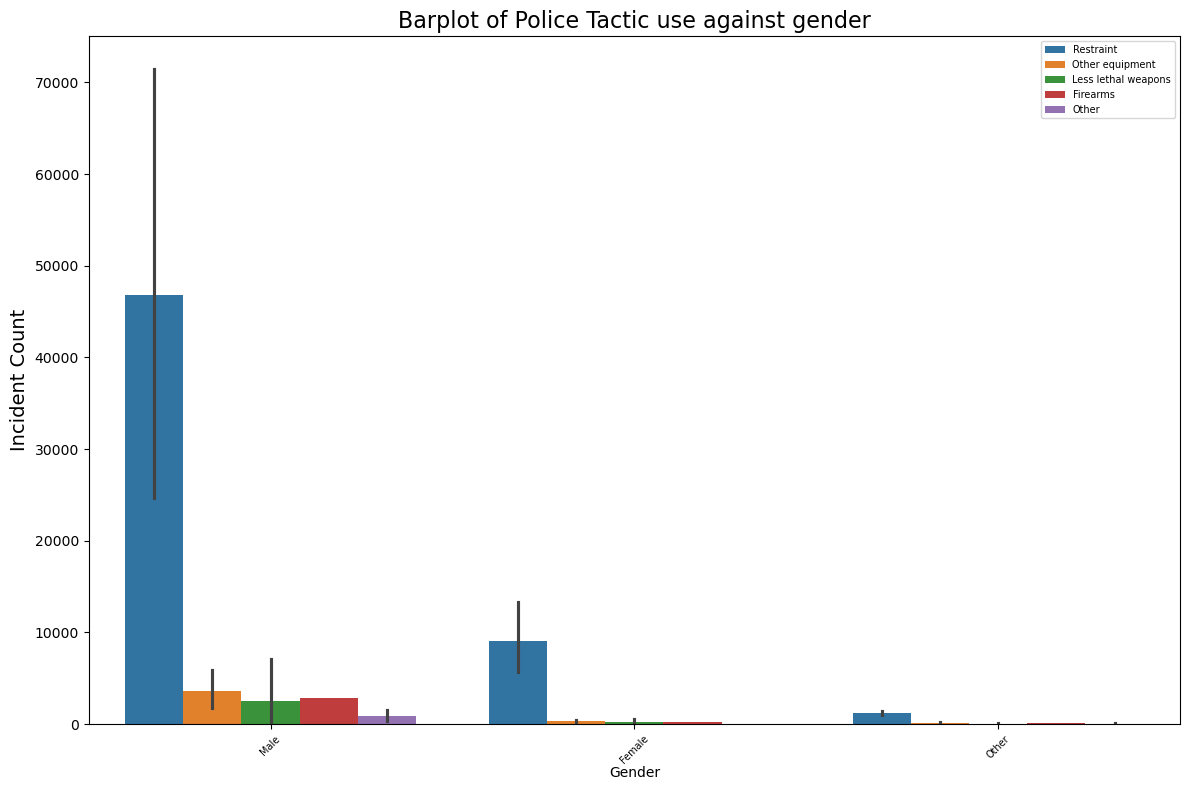

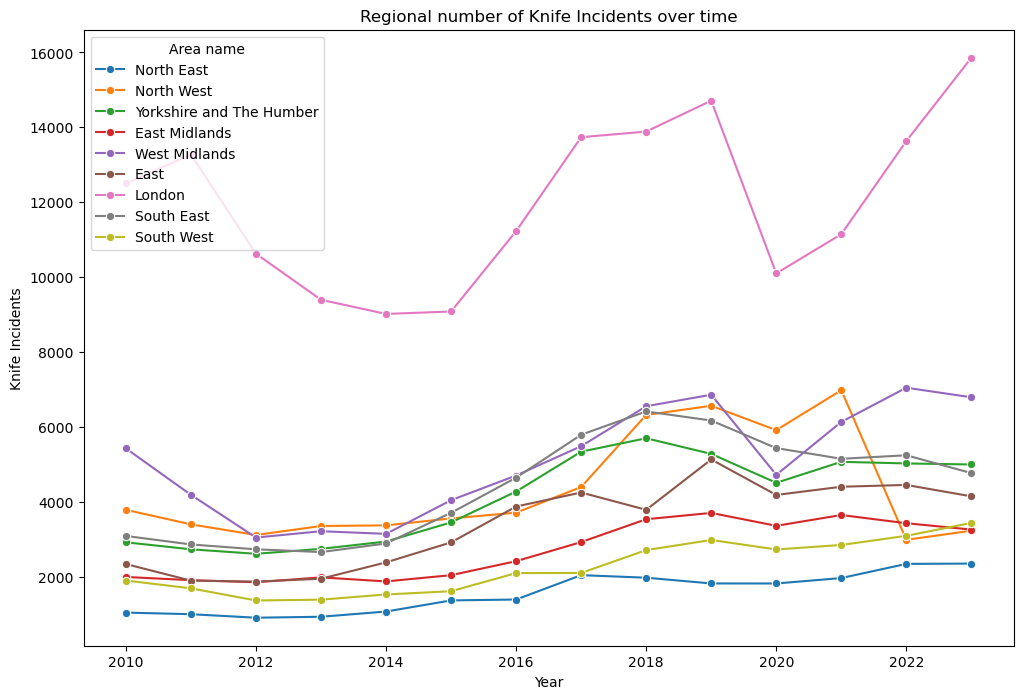

In [71]:
#Importing necessary libraries
import dash_html_components as html
import dash_leaflet as dl
import plotly.tools as tls
import dash_core_components as dcc
import dash_bootstrap_components as dbc
from jupyter_dash import JupyterDash
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotnine
from plotnine import *
from urllib.request import urlopen
import json
import folium
from folium import *
import geopandas as gpd
import requests
import matplotlib.colors as mcolors
from io import StringIO
from dash import Dash, html, dash_table, dcc


#Visualisations
#1) Treemap_Tactic
#2) Barplot_Force
#3) Age_Long_DF_Bubble
#4) Pairplot_Tactic
#5) m
#6TimeSeries_Knife

# Incorporate data
FullPoliceData = pd.ExcelFile('FullPoliceData.xlsx')

#Reading in 3rd page of the Excel sheet for analysis
Incidents_DataFrame = pd.read_excel(FullPoliceData, 2, index_col=0, skiprows = 5)

#Removing non-data
Incidents_DataFrame.drop(Incidents_DataFrame.tail(7).index,inplace=True)
Incidents_DataFrame.drop(Incidents_DataFrame.tail(2).index,inplace=True)

#Removing Missing Values
Incidents_DataFrame.dropna(inplace=True)

#Filling Missing Values
Incidents_DataFrame.bfill(inplace=True)

#Resetting Index
Incidents_DataFrame = Incidents_DataFrame.reset_index()

#Filling remaining Missing Values
Incidents_DataFrame.ffill(inplace=True)

#Setting index
Incidents_DataFrame.set_index('Type of force')

#Making Sub Data Frame
forcesplit = [Incidents_DataFrame.loc[[i]] for i in Incidents_DataFrame.index] 

#Removing variables which would skew data
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Restraint'].index)
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Unarmed skills'].index)
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Other equipment'].index)
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Less lethal weapons'].index)
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Firearms'].index)
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Other'].index)
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Total Not reported'].index)
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Handcuffing, of which'].index)
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Baton, of which'].index)
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'Irritant spray, of which'].index)
Incidents_DataFrame = Incidents_DataFrame.drop(Incidents_DataFrame[Incidents_DataFrame['Tactic'] == 'CED, of which'].index)

#Reading in second dataset for visualisation
Age_Type_DataFrame = pd.read_excel(FullPoliceData, 3, skiprows = 4)

#Cleaning second dataframe
Age_Type_DataFrame.drop([0,1])

#Renaming columns
Age_Type_DataFrame.rename(columns={"Unnamed: 0": "Type of force", "Unnamed: 1": "Tactic", "Unnamed: 10": "Total incidents per tactic"})

#Cleaning
Age_Type_DataFrame.drop(Age_Type_DataFrame.tail(8).index,inplace=True)
Age_Type_DataFrame = Age_Type_DataFrame.rename(columns={"Unnamed: 0": "Type of force", "Unnamed: 1": "Tactic", "Unnamed: 10": "Total incidents per tactic"})
Age_Type_DataFrame = Age_Type_DataFrame.drop(columns=['Unnamed: 9'])

#Transforming DataFrame
Age_Type_DataFrame = Age_Type_DataFrame.iloc[[*np.arange(1, len(Age_Type_DataFrame)), *np.arange(1)]]

#Cleaning second DataFrame
Age_Type_DataFrame = Age_Type_DataFrame.drop([1,2,35])
Age_Type_DataFrame.drop(Age_Type_DataFrame.tail(1).index,inplace=True)
Age_Type_DataFrame['Type of force'] =  Age_Type_DataFrame['Type of force'].ffill()
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Total Restraint'].index)
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Handcuffing, of which'].index)
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Total Unarmed skills'].index)
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Total Other equipment'].index)
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Baton, of which'].index)
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Irritant spray, of which'].index)
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Total Less lethal weapons'].index)
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'AEP, of which'].index)
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Total Other'].index)
Age_Type_DataFrame = Age_Type_DataFrame.drop(Age_Type_DataFrame[Age_Type_DataFrame['Tactic'] == 'Dog use, of which'].index)

#Combining variables in second DataFrame
Age_Type_DataFrame_long = Age_Type_DataFrame.melt(id_vars=["Type of force", "Tactic", "Total incidents per tactic"], 
                  value_vars=["Under 11 years", "11 - 17 years", "18 - 34 years", "35 - 49 years", "50 - 64 years", "65 and over", "Not reported"],
                  var_name="Age Group", value_name="Incident Count")

Age_Type_DataFrame_long = Age_Type_DataFrame_long.drop(Age_Type_DataFrame_long[Age_Type_DataFrame_long['Tactic'] == 'Tactical communication (with other tactic)'].index)

#Initialising Third Graph
Age_Long_DF_Bubble = (ggplot(Age_Type_DataFrame_long, aes( x = 'Tactic', y = 'Incident Count', size = 'Incident Count', color = 'Age Group'))) + geom_point(alpha = 0.6) + labs(title='Bubble Plot of Incident Count by Tactic and Age Group', x='Tactic', y='Incident Count') + theme_bw() + theme (figure_size=(11, 6), axis_text_x=element_text(rotation=90, size=5)) + scale_size_continuous() + scale_size_area(max_size=30)

#Reading in third datasheet for third DataFrame
Gender_DF = pd.read_excel(FullPoliceData, 4, skiprows=4)

#Cleaning third Dataframe
Gender_DF = Gender_DF.rename(columns={"Unnamed: 0": "Type of force", "Unnamed: 1": "Tactic", "Unnamed: 7": "Total incidents per tactic"})
Gender_DF = Gender_DF.drop(columns=['Unnamed: 6'])
Gender_DF = Gender_DF.drop(Gender_DF.index[34:44])
Gender_DF['Other'] = Gender_DF['Other'] + Gender_DF['Not reported']
Gender_DF = Gender_DF.drop(columns=['Not reported'])
Gender_DF = Gender_DF.drop([0,1,2])
Gender_DF = Gender_DF.drop([44])

#Initialising fourth graph
Pairplot_Tactic = sns.pairplot(data = Gender_DF, hue = 'Tactic')

#Further transforming third dataframe for fifth graph
Gender_DF_Long = Gender_DF.melt(id_vars=["Type of force", "Tactic", "Total incidents per tactic"], 
                  value_vars=["Male", "Female", "Other"],
                  var_name="Gender", value_name="Incident Count")
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Total Restraint'].index)
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Handcuffing, of which'].index)
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Total Unarmed skills'].index)
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Total Other equipment'].index)
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Baton, of which'].index)
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Total Less lethal weapons'].index)
Gender_DF_Long = Gender_DF_Long.drop(Gender_DF_Long[Gender_DF_Long['Tactic'] == 'Total Other'].index)


#Reading in fourth datasheet for sixth graph
UK_Regions_Incidents = pd.read_excel(FullPoliceData, 13, skiprows = 3)

#Cleaning fourth dataset
UK_Regions_Incidents = UK_Regions_Incidents.drop(UK_Regions_Incidents.index[54:57])
UK_Regions_Incidents = UK_Regions_Incidents[~UK_Regions_Incidents['Police force'].str.contains('total', case=False, na=False)]

#Making smaller dataframe
region_totals = UK_Regions_Incidents.groupby('Region')['Total'].sum().reset_index()
region_totals['Region'] = region_totals['Region'].replace('Yorkshire and the Humber', 'Yorkshire and The Humber')

#importing geojson file for map
geojson_url = 'https://raw.githubusercontent.com/codeforgermany/click_that_hood/master/public/data/united-kingdom-regions.geojson'

#geojson code
response = requests.get(geojson_url)
geojson_data = response.text
gdf = gpd.read_file(StringIO(geojson_data))

#selecting regions for the map visual
regions_of_interest = ["East Midlands", "East of England", "London", "North East", "North West", "South East", "South West", "Wales", "West Midlands", "Yorkshire and The Humber"]
gdf_filtered = gdf[gdf['name'].isin(regions_of_interest)]

#Setting up geojson
gdf_filtered = gdf[gdf['name'].isin(region_totals['Region'])]
gdf_filtered = gdf_filtered.merge(region_totals, left_on='name', right_on='Region', how='left')

#values for map
min_total = gdf_filtered['Total'].min()
max_total = gdf_filtered['Total'].max()

#colour scale
norm = mcolors.Normalize(vmin=min_total, vmax=max_total)
cmap = plt.cm.ScalarMappable(norm=norm, cmap='RdYlGn_r')

#initialising map
m = folium.Map(location=[52.0, -1.5], zoom_start=6)

#map colour parameters
def style_function(feature):
    region = feature['properties']['name']
    total = gdf_filtered[gdf_filtered['name'] == region]['Total'].values[0]
    color = cmap.to_rgba(total)  # Get the color from the colormap
    return {
        'fillColor': mcolors.to_hex(color),  # Convert RGBA to Hex color
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }

#removing errorneous entries
gdf_filtered = gdf_filtered.drop(columns=['created_at', 'updated_at'], errors='ignore')

#placing region values onto map
folium.GeoJson(gdf_filtered, style_function=style_function).add_to(m)

#reading in second external dataset for seventh graph
FullPoliceTimeSeries = pd.ExcelFile('policeforceareatablesfinal.xlsx')
Knife_TimeSeries = pd.read_excel(FullPoliceTimeSeries, 8, skiprows = 7, header = 1)

Knife_TimeSeries = Knife_TimeSeries.drop(columns=['Area Codes'])

#cleaning
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2010 to Mar 2011": "2010", "% involving a knife Apr 2010\n to Mar 2011": "2010 Knife %", "Apr 2011 to Mar 2012\n[note 10]": "2011", "% involving a knife Apr 2011\n to Mar 2012": "2011 Knife %"})
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2012 to Mar 2013": "2012", "% involving a knife Apr 2012 \nto Mar 2013": "2012 Knife %", "Apr 2013 to Mar 2014": "2013", "% involving a knife Apr 2013\n to Mar 2014": "2013 Knife %"})
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2014 to Mar 2015": "2014", "% involving a knife Apr 2014\n to Mar 2015": "2014 Knife %", "Apr 2015 to Mar 2016": "2015", "% involving a knife Apr 2015\n to Mar 2016": "2015 Knife %"})
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2016 to Mar 2017": "2016", "% involving a knife Apr 2016\n to Mar 2017": "2016 Knife %", "Apr 2017 to Mar 2018": "2017", "% involving a knife Apr 2017\n to Mar 2018": "2017 Knife %"})
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2018 to Mar 2019": "2018", "% involving a knife Apr 2018\n to Mar 2019": "2018 Knife %", "Apr 2019 to Mar 2020": "2019", "% involving a knife Apr 2019 to Mar 2020": "2019 Knife %"})
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Apr 2020 to Mar 2021": "2020", "% involving a knife Apr 2020 to Mar 2021": "2020 Knife %", "Apr 2021 to Mar 2022": "2021", "% involving a knife Apr 2021 to Mar 2022": "2021 Knife %"})
Knife_TimeSeries = Knife_TimeSeries.rename(columns={"Jul 2022 to Jun 2023\n[note 3]": "2022", "% involving a knife Jul 2022 to Jun 2023": "2022 Knife %", "Jul 2023 to Jun 2024\n[note 3]": "2023", "% involving a knife Jul 2023 to Jun 2024": "2023 Knife %"})
Knife_TimeSeries = Knife_TimeSeries.drop(columns=['Jul 2023 to Jun 2024 compared with previous year % change'])
Knife_TimeSeries = Knife_TimeSeries.drop([0,1,3])
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("ENGLAND [note 3, 9]", "England")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Northumbria [note 11]", "Northumbria")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Greater Manchester [note 3, 9]", "Manchester")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Leicestershire [note 6]", "Leicestershire")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Essex [note 11]", "Essex")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Surrey [note 7][note 11]", "Surrey")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Norfolk [note 11]", "Norfolk")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Sussex [note 11][note 12]", "Sussex")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Suffolk [note 11]", "Suffolk")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Thames Valley [note 11]", "Thames Valley")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("Avon and Somerset [note 11]", "Avon and Somerset")
Knife_TimeSeries["Area name"] = Knife_TimeSeries["Area name"].replace("WALES", "Wales")

#casting variable types
Knife_TimeSeries["2022"] = pd.to_numeric(Knife_TimeSeries["2022"], errors = 'coerce')
Knife_TimeSeries["2022 Knife %"] = pd.to_numeric(Knife_TimeSeries["2022 Knife %"], errors = 'coerce')
Knife_TimeSeries["2023"] = pd.to_numeric(Knife_TimeSeries["2023"], errors = 'coerce')
Knife_TimeSeries["2023 Knife %"] = pd.to_numeric(Knife_TimeSeries["2023 Knife %"], errors = 'coerce')

#initialising regions for knife crime
UK_regions = ['North East ', 'North West', 'Yorkshire and The Humber', 'West Midlands', 'East Midlands', 'East', 'South East', 'South West', 'London']

UK_Knife_Small_DF = Knife_TimeSeries[Knife_TimeSeries['Area name'].isin(UK_regions)]

UK_Knife_Small_DF.rename(columns = {'Apr 2016 to Mar 2017': '2016'})

UK_Knife_Small_Long = pd.melt(UK_Knife_Small_DF, id_vars=["Area name"], value_vars=[str(year) for year in range(2010, 2024)],  var_name="Year", value_name="Knife Incidents")

UK_Knife_Small_Long['Year'] = UK_Knife_Small_Long['Year'].astype(int)

UK_Knife_Small_Long['Knife Incidents'] = pd.to_numeric(UK_Knife_Small_Long['Knife Incidents'], errors='coerce')

#initialising graph 7

#plt.figure(figsize=(12, 8))
#TimeSeries_Knife = sns.lineplot(x="Year", y="Knife Incidents", hue="Area name", data=UK_Knife_Small_Long, marker="o").set_title("Regional number of Knife Incidents over time")

#Graphs
#1
Treemap_Tactic = px.treemap(Incidents_DataFrame, path=[px.Constant("all"), 'Type of force', 'Tactic'],
                 values='Total', color='Tactic')
Treemap_Tactic.update_layout(margin = dict(t=50, l=25, r=25, b=25))
Treemap_Tactic.show()


#2
Barplot_Force = ggplot(Incidents_DataFrame)+ geom_bar(mapping = aes(x = 'Type of force', y = 'Total'), stat = "identity") + labs(title="Number of Force incidents by type")
Barplot_Force
#matplotlib_Barplot_Force = Barplot_Force.draw()
#plotly_BarPlot_Force = tls.mpl_to_plotly(matplotlib_Barplot_Force)
#plotly_BarPlot_Force


#3
Age_Long_DF_Bubble = (ggplot(Age_Type_DataFrame_long, aes( x = 'Tactic', y = 'Incident Count', size = 'Incident Count', color = 'Age Group'))) + geom_point(alpha = 0.6) + labs(title='Bubble Plot of Incident Count by Tactic and Age Group', x='Tactic', y='Incident Count') + theme_bw() + theme (figure_size=(11, 6), axis_text_x=element_text(rotation=90, size=5)) + scale_size_continuous() + scale_size_area(max_size=30)
Age_Long_DF_Bubble


#4
Pairplot_Tactic

#5
plt.figure(figsize=(12, 8))
barplot_gender = sns.barplot(x = 'Gender', y = 'Incident Count', data = Gender_DF_Long, hue = 'Type of force')
plt.title('Barplot of Police Tactic use against gender', fontsize=16)
plt.xlabel('Gender',fontsize=10, loc = 'center', labelpad=0.1)
plt.ylabel('Incident Count',fontsize=14)
plt.legend(loc='best',fontsize=7, alignment = 'left').set_visible(True)
plt.xticks(rotation = 45, fontsize = 7)
plt.tight_layout()
barplot_gender

#6 interactive map
#needed to parse into 'dash leaflet' as geojson otherwise does not render
#map_component = dl.Map(center=[52.0, -1.5], zoom=6, children=[
   # dl.TileLayer(),
   # dl.GeoJSON(
      #  data=geojson_data,  # Use the GeoJSON data you obtained
      #  id="geojson-layer",
      #  options=dict(style= lambda feature: {
     #       'color': 'black',
    #        'weight': 1,
    #        'fillColor': mcolors.to_hex(cmap.to_rgba(
    #            gdf_filtered[gdf_filtered['name'] == feature['properties']['name']]['Total'].values[0]
   #         )),
   #         'fillOpacity': 0.7
  #      })
 #   )
#])
#m

#7
plt.figure(figsize=(12, 8))
TimeSeries_Knife = sns.lineplot(x="Year", y="Knife Incidents", hue="Area name", data=UK_Knife_Small_Long, marker="o").set_title("Regional number of Knife Incidents over time")
TimeSeries_Knife

























# Initialize the app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Cards for the plots
card_plot1 = dbc.Card(
    [
     dbc.CardBody([dcc.Graph(figure=Treemap_Tactic)])],
    className="mb-3"
)

card_plot2 = dbc.Card(
    [
     dbc.CardBody([dcc.Graph(figure=Barplot_Force)])],
    className="mb-3"
)

card_plot3 = dbc.Card(
    [
     dbc.CardBody([dcc.Graph(figure=Age_Long_DF_Bubble)])],
    className="mb-3"
)

card_plot4 = dbc.Card(
    [
     dbc.CardBody([dcc.Graph(figure=Pairplot_Tactic)])],
    className="mb-3"
)

card_plot5 = dbc.Card(
    [
     dbc.CardBody([dcc.Graph(figure=barplot_gender)])],
    className="mb-3"
)

card_plot6 = dbc.Card(
    [
     dbc.CardBody([dcc.Graph(figure=TimeSeries_Knife)])],
    className="mb-3"
)

#card_plot7 = dbc.Card(
    #[
     #dbc.CardBody([dcc.Graph(figure=m)])],
    #className="mb-3"
#)



# App layout
app.layout = html.Div([
    dbc.Row([
        dbc.Col(html.H1("UK Police Use of Force", className="mb-4"), width=6),
        dbc.Col(card_plot6, width=4),
        #dbc.Col(card_plot7, width=4)
    ]),
    dbc.Row([
        dbc.Col(card_plot2, width=6),
        dbc.Col(card_plot1, width=6),
        
    ]),
    dbc.Row([
        dbc.Col(card_plot3, width=4),
        dbc.Col(card_plot4, width=4),
        dbc.Col(card_plot5, width=4)
    ])
])

app.run_server(debug=True)

# Run the app
#if __name__ == '__main__':
    #app.run(debug=True)

In [72]:
m

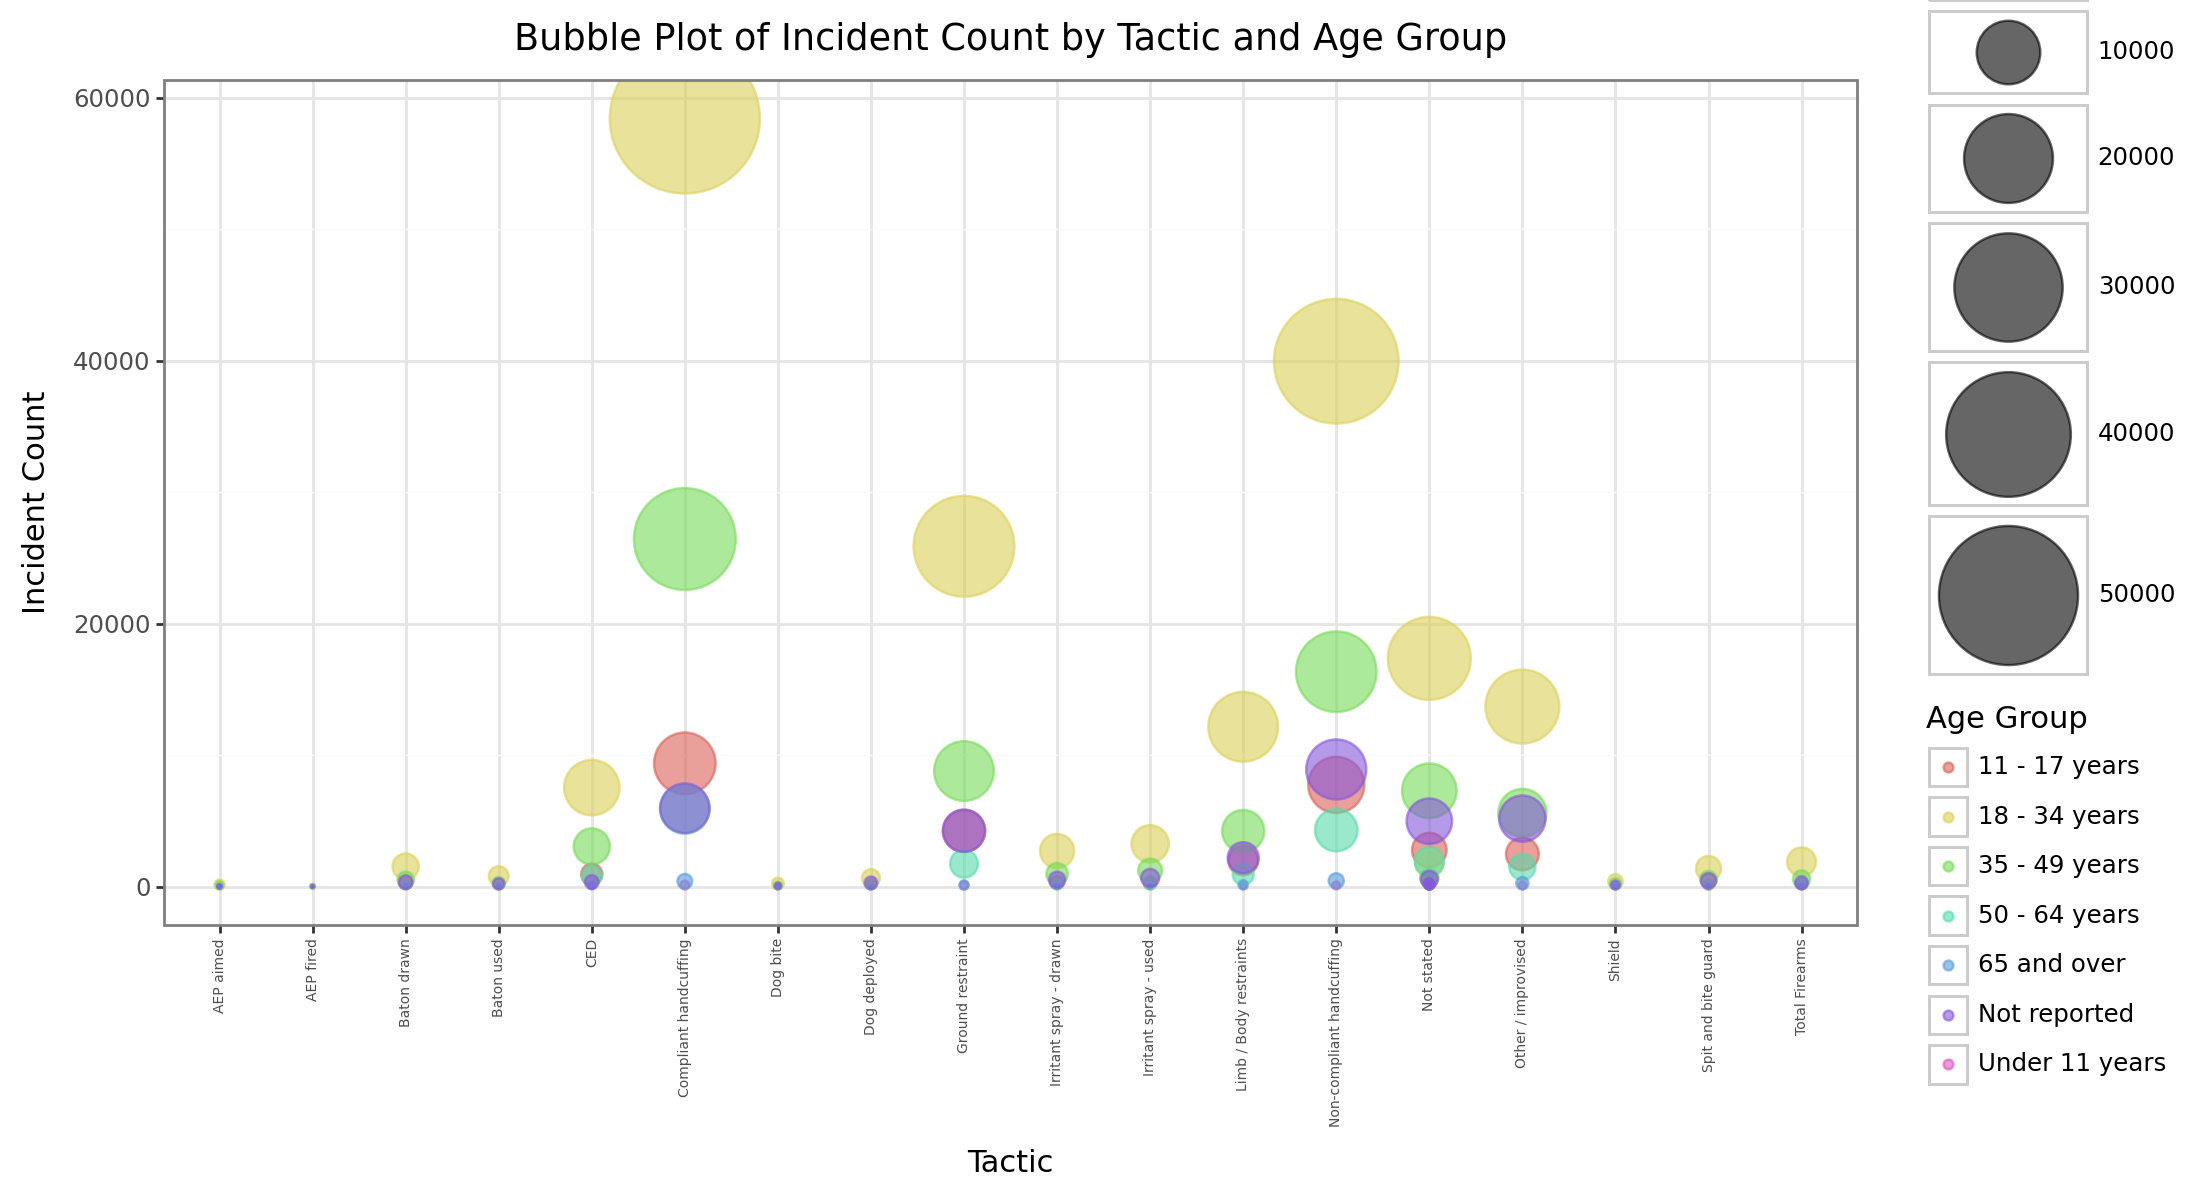

In [73]:
Age_Long_DF_Bubble

## 4. Articulation of Decision Making Process
Explain the main focus of the project, including the specific decision-making process under study.  Ensure this has explicit links to your reflective blog.  

E.g. Cleaning the data required the development of knowledge of XML and suitable python libraries were evaluated to assist in this process.  Refer to blog post 3 on 14th October for further details [Link provided here]

## 5. Review of Analytics Methods Chosen
Discuss the analytics methods used in the project and their rationale.

## 6. Review of Available Tools
Present the tools and technologies you could have used in the project if you had free choice.  Discuss why they would be suitable and what benefits they would bring.  Also discuss any barriers or pitfalls that using such tools might raise.

## 7. Review of Chosen Datasets 
Refer to the link you have provided in the table at the beginning of the document.  Discuss why the datasets chosen were appropriate.  Reflect on working with them and refer to blog posts where necessary. 

## 8. Visualisation of Data with Accompanying Code
Display various key visualizations of the data along with the corresponding code.  Discuss why each of these key visualisations were chosen for the dashboard.  Justify their inclusion and show how they were created.

Do not discuss every visualisation in the dashboard, but be strategic about which ones you feel need further elaboration here.

In [74]:
#Accompanying code for section 8

## 9. Reflective Evaluation
Reflect on the project's process, challenges faced, and lessons learned.

## 10. Conclusion
Summarize the overall outcomes and significance of the project.


## References
Include any references, data sources, or external materials used in the project.
Remember, this is just a suggested outline; feel free to modify it based on the specific requirements and content of your BEMM461 project coursework.